# Hipothesis - Titles' Success
## Titles Awards

In [1]:
#libraries
library(ggplot2)
library(dplyr) 
library(tidyverse)
library(stringr)
library(igraph)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  3.0.4     ✔ purrr   0.3.2
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘igraph’

The following objects are masked from ‘package:purrr’:

    compose, simplify

The following object is masked from ‘package:tidyr’:

    crossing

The following object is masked from ‘packag

In [5]:
options(repr.plot.width=25,repr.plot.height=18,repr.plot.res=200)

In [3]:
#get data
merged_basics_ratings_awards = read.delim("./../dataset/merged_title_basics_ratings_awards.tsv",header=TRUE) 

In [4]:
head(merged_basics_ratings_awards)

tconst    titleType primaryTitle           isAdult startYear runtimeMinutes
1 tt0000001 short     Carmencita             0       1894       1            
2 tt0000002 short     Le clown et ses chiens 0       1892       5            
3 tt0000003 short     Pauvre Pierrot         0       1892       4            
4 tt0000004 short     Un bon bock            0       1892      12            
5 tt0000005 short     Blacksmith Scene       0       1893       1            
6 tt0000006 short     Chinese Opium Den      0       1894       1            
  genre1      genre2 genre3  category_emmy win_emmy category_gg_film
1 Documentary Short  0       NA            NA       NA              
2 Animation   Short  0       NA            NA       NA              
3 Animation   Comedy Romance NA            NA       NA              
4 Animation   Short  0       NA            NA       NA              
5 Comedy      Short  0       NA            NA       NA              
6 Short       0      0       NA            NA       NA              
  win_gg_film category_gg_people nominee win_gg_people averageRating numVotes
1 NA          NA                 NA      NA            5.6           1654    
2 NA          NA                 NA      NA            6.1            199    
3 NA          NA                 NA      NA            6.5           1366    
4 NA          NA                 NA      NA            6.2            121    
5 NA          NA                 NA      NA            6.2           2149    
6 NA          NA                 NA      NA            5.3            115

## Let's analyse the awards nominees!

In [6]:
#get those with nominees
nominees_subset = merged_basics_ratings_awards[which(!is.na(merged_basics_ratings_awards$nominee)),]
#filter numVotes > 1000
nominees_subset = subset(nominees_subset,numVotes>1000)

In [7]:
head(nominees_subset)
summary(nominees_subset)

tconst    titleType primaryTitle    isAdult startYear runtimeMinutes
31821 tt0035423 movie     Kate & Leopold  0       2001      118           
31822 tt0035423 movie     Kate & Leopold  0       2001      118           
33127 tt0036855 movie     Gaslight        0       1944      114           
33143 tt0036872 movie     Going My Way    0       1944      126           
33144 tt0036872 movie     Going My Way    0       1944      126           
33341 tt0037096 movie     Mrs. Parkington 0       1944      124           
      genre1 genre2  genre3  category_emmy win_emmy category_gg_film
31821 Comedy Fantasy Romance NA            NA       NA              
31822 Comedy Fantasy Romance NA            NA       NA              
33127 Crime  Drama   Mystery NA            NA       NA              
33143 Comedy Drama   Music   NA            NA       Picture         
33144 Comedy Drama   Music   NA            NA       Picture         
33341 Drama  Romance 0       NA            NA       NA              
      win_gg_film
31821 NA         
31822 NA         
33127 NA         
33143  1         
33144  1         
33341 NA         
      category_gg_people                                                       
31821 Best Performance by an Actor in a Motion Picture - Musical or Comedy     
31822 Best Original Song - Motion Picture                                      
33127 Actress In A Leading Role                                                
33143 Best Performance by an Actor in a Supporting Role in any Motion Picture  
33144 Best Director - Motion Picture                                           
33341 Best Performance by an Actress in a Supporting Role in any Motion Picture
      nominee          win_gg_people averageRating numVotes
31821 Hugh Jackman     0             6.4           78173   
31822 "Until…", Sting  1             6.4           78173   
33127 Ingrid Bergman   1             7.8           23884   
33143 Barry Fitzgerald 1             7.0           10302   
33144 Leo McCarey      1             7.0           10302   
33341 Agnes Moorehead  1             7.1            1369

       tconst       titleType                  primaryTitle     isAdult 
 tt1848902:  48   movie  :2498   Game Change         :  48   Min.   :0  
 tt1000771:  44   short  :   0   Recount             :  44   1st Qu.:0  
 tt0758751:  34   tvMovie: 540   Grey Gardens        :  34   Median :0  
 tt0423510:  32                  Warm Springs        :  32   Mean   :0  
 tt0423455:  30                  Hemingway & Gellhorn:  30   3rd Qu.:0  
 tt1278469:  30                  Temple Grandin      :  30   Max.   :0  
 (Other)  :2820                  (Other)             :2820              
   startYear    runtimeMinutes        genre1        genre2          genre3    
 Min.   :1944   Min.   : 74.0   Drama    :998   Drama  :1340   0       :1294  
 1st Qu.:1975   1st Qu.:105.0   Biography:794   0      : 343   Romance : 430  
 Median :1995   Median :118.0   Comedy   :672   Romance: 319   History : 322  
 Mean   :1991   Mean   :122.4   Adventure:184   Crime  : 158   Drama   : 241  
 3rd Qu.:2008   3rd Q

In [8]:
nrow(nominees_subset)

[1] 3038

In [9]:
different_people = (unique((nominees_subset$nominee)))
n_different_people = length(different_people)
n_different_people

[1] 1470

In [10]:
film_person = nominees_subset %>% select(1,15)
head(film_person)
nrow(film_person)
film_person_win = nominees_subset %>% select(1,15,16,17)

tconst    nominee         
31821 tt0035423 Hugh Jackman    
31822 tt0035423 "Until…", Sting 
33127 tt0036855 Ingrid Bergman  
33143 tt0036872 Barry Fitzgerald
33144 tt0036872 Leo McCarey     
33341 tt0037096 Agnes Moorehead

[1] 3038

In [11]:
head(film_person_win)

tconst    nominee          win_gg_people averageRating
31821 tt0035423 Hugh Jackman     0             6.4          
31822 tt0035423 "Until…", Sting  1             6.4          
33127 tt0036855 Ingrid Bergman   1             7.8          
33143 tt0036872 Barry Fitzgerald 1             7.0          
33144 tt0036872 Leo McCarey      1             7.0          
33341 tt0037096 Agnes Moorehead  1             7.1

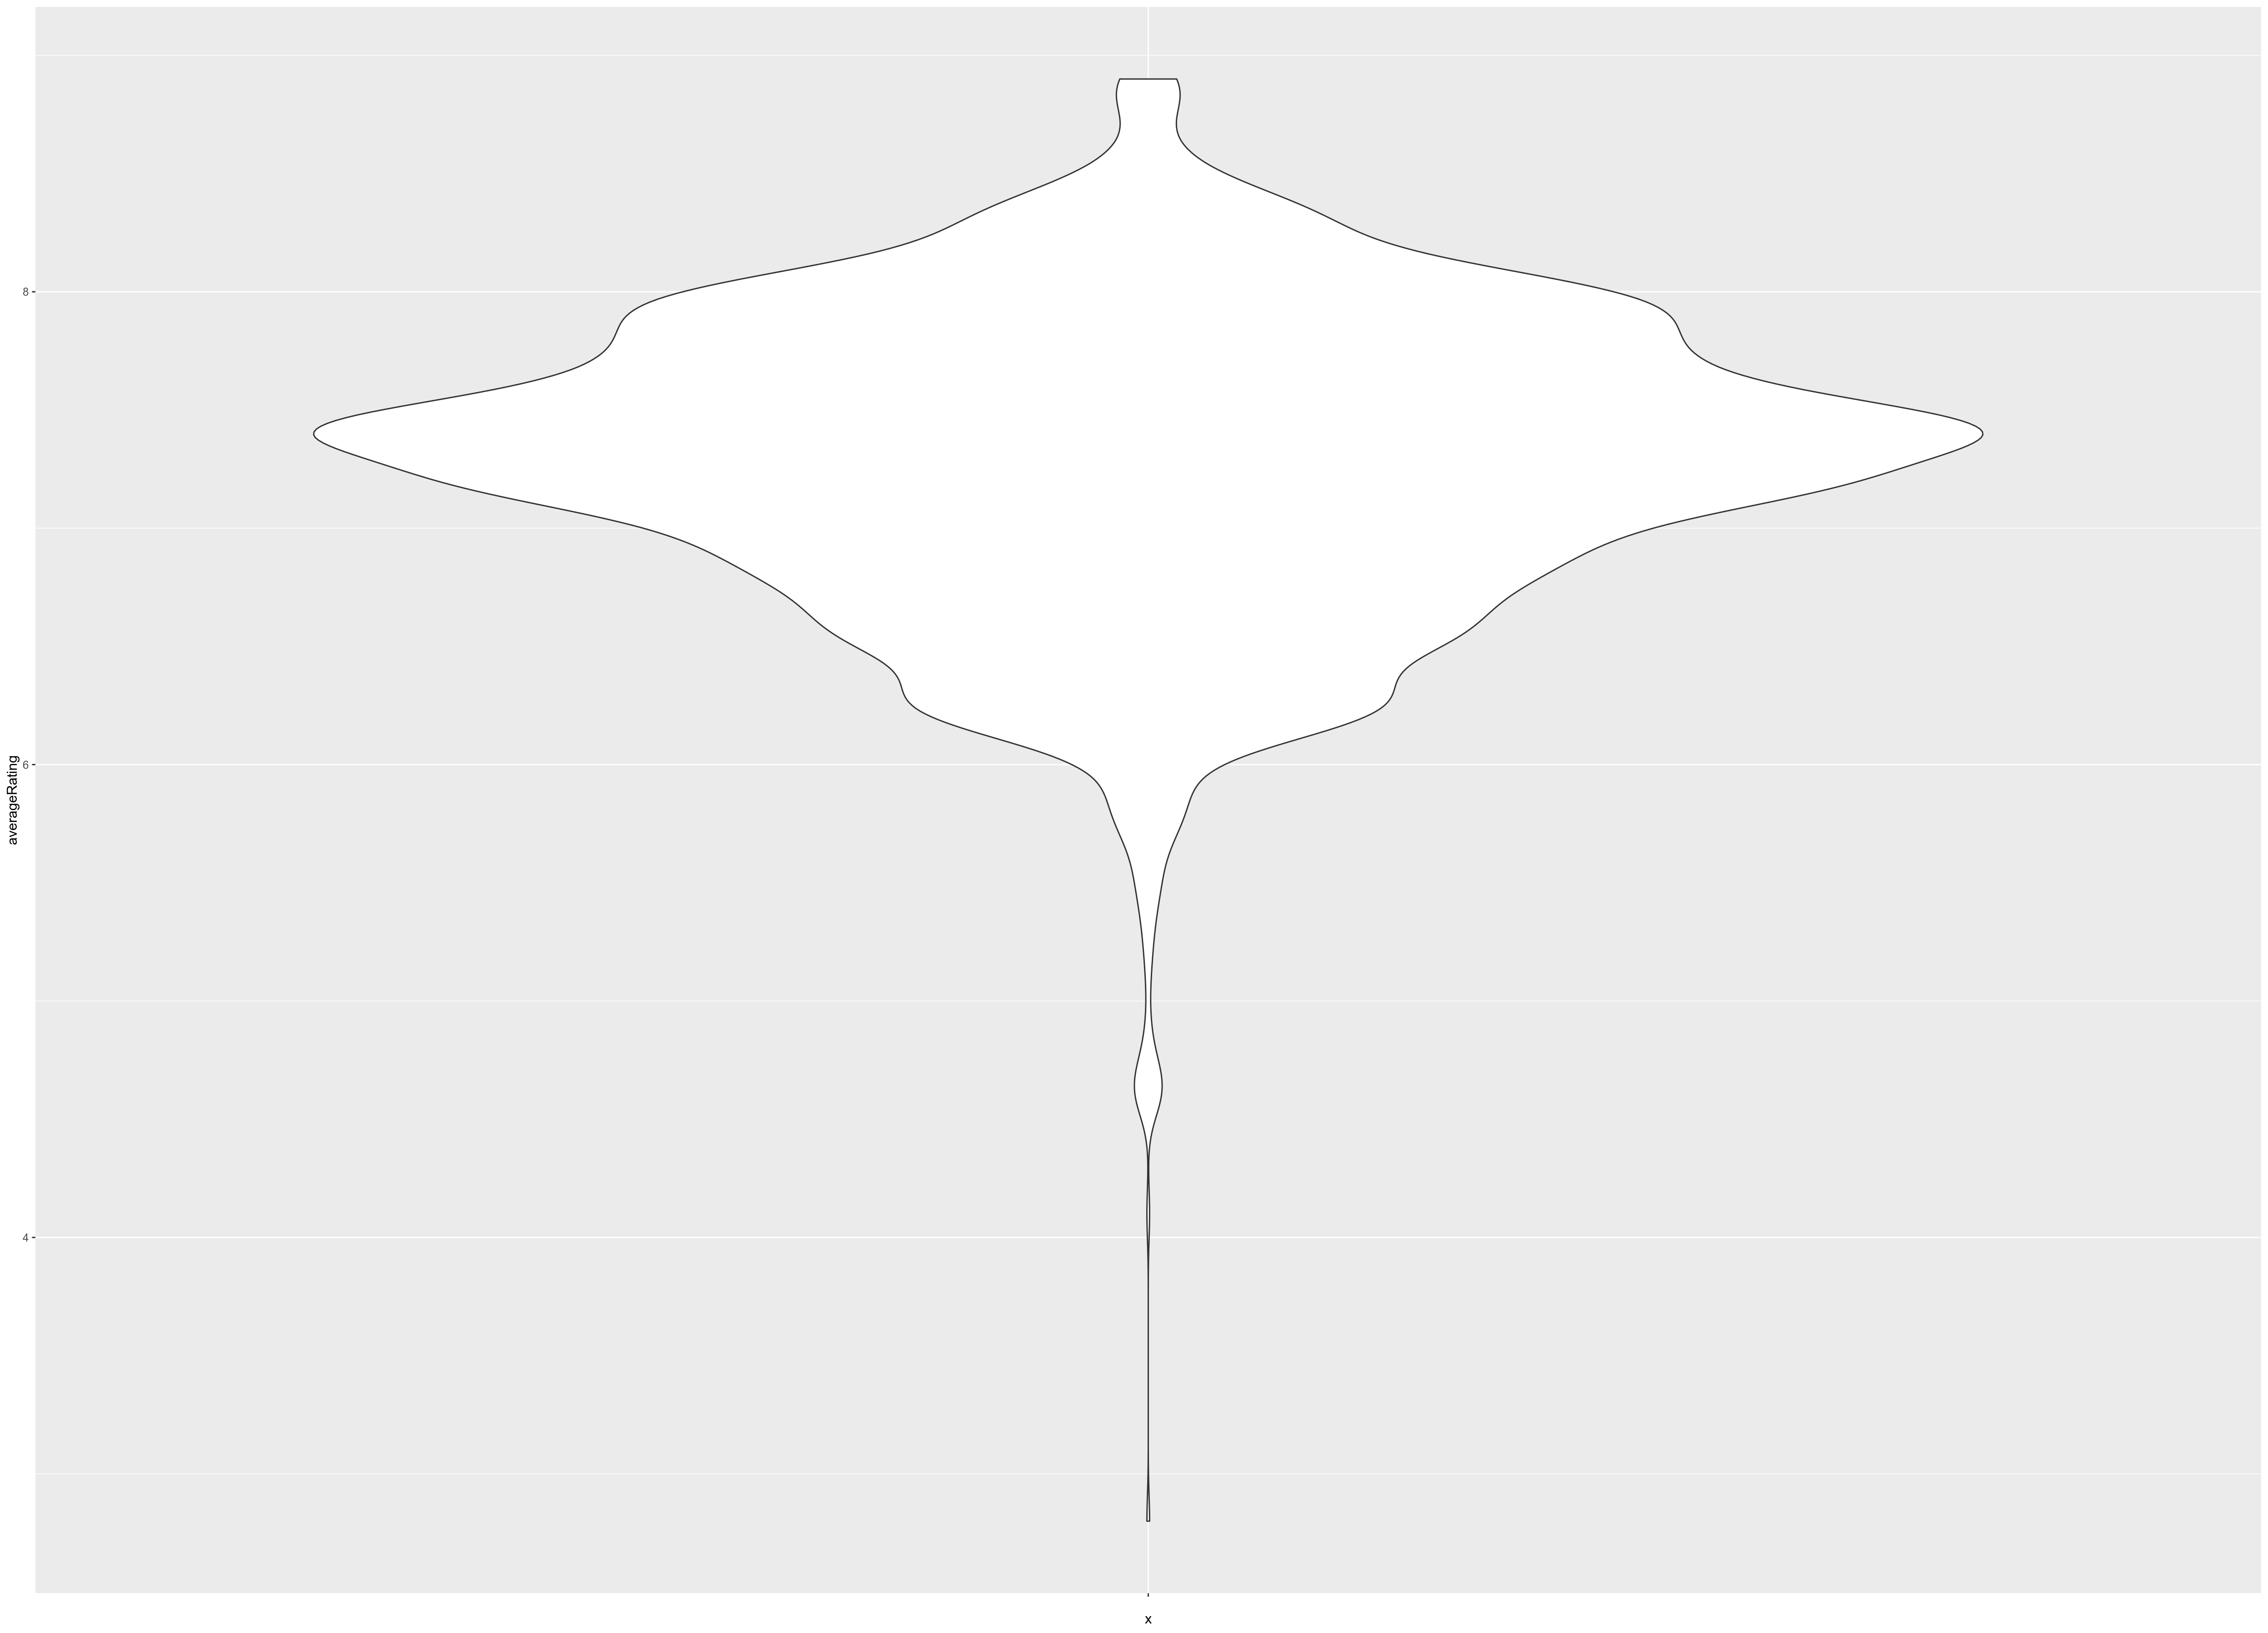

In [12]:
ggplot()+geom_violin(data=film_person_win,aes(x="",y=averageRating))

In [13]:
film_person_win$color = NA
film_person_win$color_v = NA
film_person_win[film_person_win$win_gg_people == 0,]$color_v = "firebrick"
film_person_win[film_person_win$win_gg_people == 1,]$color_v = "limegreen"
film_person_win[film_person_win$averageRating >= 7.5,]$color = "limegreen"
film_person_win[film_person_win$averageRating <= 5,]$color = "firebrick"
film_person_win[(film_person_win$averageRating>5 & film_person_win$averageRating<7.5) ,]$color = "darkorange"

head(film_person_win)

tconst    nominee          win_gg_people averageRating color     
31821 tt0035423 Hugh Jackman     0             6.4           darkorange
31822 tt0035423 "Until…", Sting  1             6.4           darkorange
33127 tt0036855 Ingrid Bergman   1             7.8           limegreen 
33143 tt0036872 Barry Fitzgerald 1             7.0           darkorange
33144 tt0036872 Leo McCarey      1             7.0           darkorange
33341 tt0037096 Agnes Moorehead  1             7.1           darkorange
      color_v  
31821 firebrick
31822 limegreen
33127 limegreen
33143 limegreen
33144 limegreen
33341 limegreen

In [14]:
summary(film_person_win)

       tconst                 nominee     win_gg_people   averageRating 
 tt1848902:  48   Al Pacino       :  36   Min.   :0.000   Min.   :2.80  
 tt1000771:  44   Jessica Lange   :  29   1st Qu.:0.000   1st Qu.:6.90  
 tt0758751:  34   Kenneth Branagh :  26   Median :0.000   Median :7.40  
 tt0423510:  32   Nicole Kidman   :  24   Mean   :0.262   Mean   :7.29  
 tt0423455:  30   Vanessa Redgrave:  20   3rd Qu.:1.000   3rd Qu.:7.70  
 tt1278469:  30   Drew Barrymore  :  19   Max.   :1.000   Max.   :8.90  
 (Other)  :2820   (Other)         :2884                                 
    color             color_v         
 Length:3038        Length:3038       
 Class :character   Class :character  
 Mode  :character   Mode  :character  
                                      
                                      
                                      
                                      

In [15]:
split_films=split(film_person,film_person$tconst)

In [16]:
length(split_films)

[1] 1248111

In [17]:
split_films[[1]]

tconst nominee

In [18]:
combination_matrix = c()
for (i in 1:length(split_films)){
    if(length(split_films[[i]][[2]]) > 1) {
        temp = combn(as.vector(split_films[[i]][[2]]),2)
        combination_matrix = cbind(combination_matrix,temp)
    }
}

In [19]:
combination_matrix

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. 

[,1]            [,2]             [,3]         [,4]         [,5]        
[1,] Hugh Jackman    Barry Fitzgerald Billy Wilder Anne Baxter  Celeste Holm
[2,] "Until…", Sting Leo McCarey      Ray Milland  Clifton Webb Elia Kazan  
     [,6]           [,7]           [,8]              [,9]             
[1,] Celeste Holm   Elia Kazan     Richard Schweizer Richard Schweizer
[2,] Dean Stockwell Dean Stockwell Fred Zinnemann    Ivan Jandl       
     [,10]          [,11] [,12]              [,13]              [,14]      
[1,] Fred Zinnemann ...   Scarlett Johansson Scarlett Johansson Adam Driver
[2,] Ivan Jandl     ...   Noah Baumbach      Randy Newman       Laura Dern 
     [,15]         [,16]        [,17]         [,18]        [,19]        
[1,] Adam Driver   Adam Driver  Laura Dern    Laura Dern   Noah Baumbach
[2,] Noah Baumbach Randy Newman Noah Baumbach Randy Newman Randy Newman 
     [,20]         [,21]       
[1,] Sam Mendes    Ana de Armas
[2,] Thomas Newman Daniel Craig

In [20]:
nominees_film_df = data.frame(from=combination_matrix[1,],to=combination_matrix[2,])

In [21]:
graph_film_nominees = graph_from_data_frame(nominees_film_df,directed=FALSE)

In [22]:
E(graph_film_nominees)$color = film_person_win$color
V(graph_film_nominees)$color = film_person_win$color_v

Warning message in eattrs[[name]][index] <- value:
“number of items to replace is not a multiple of replacement length”Warning message in vattrs[[name]][index] <- value:
“number of items to replace is not a multiple of replacement length”

In [23]:
coords <- layout.auto(graph_film_nominees)

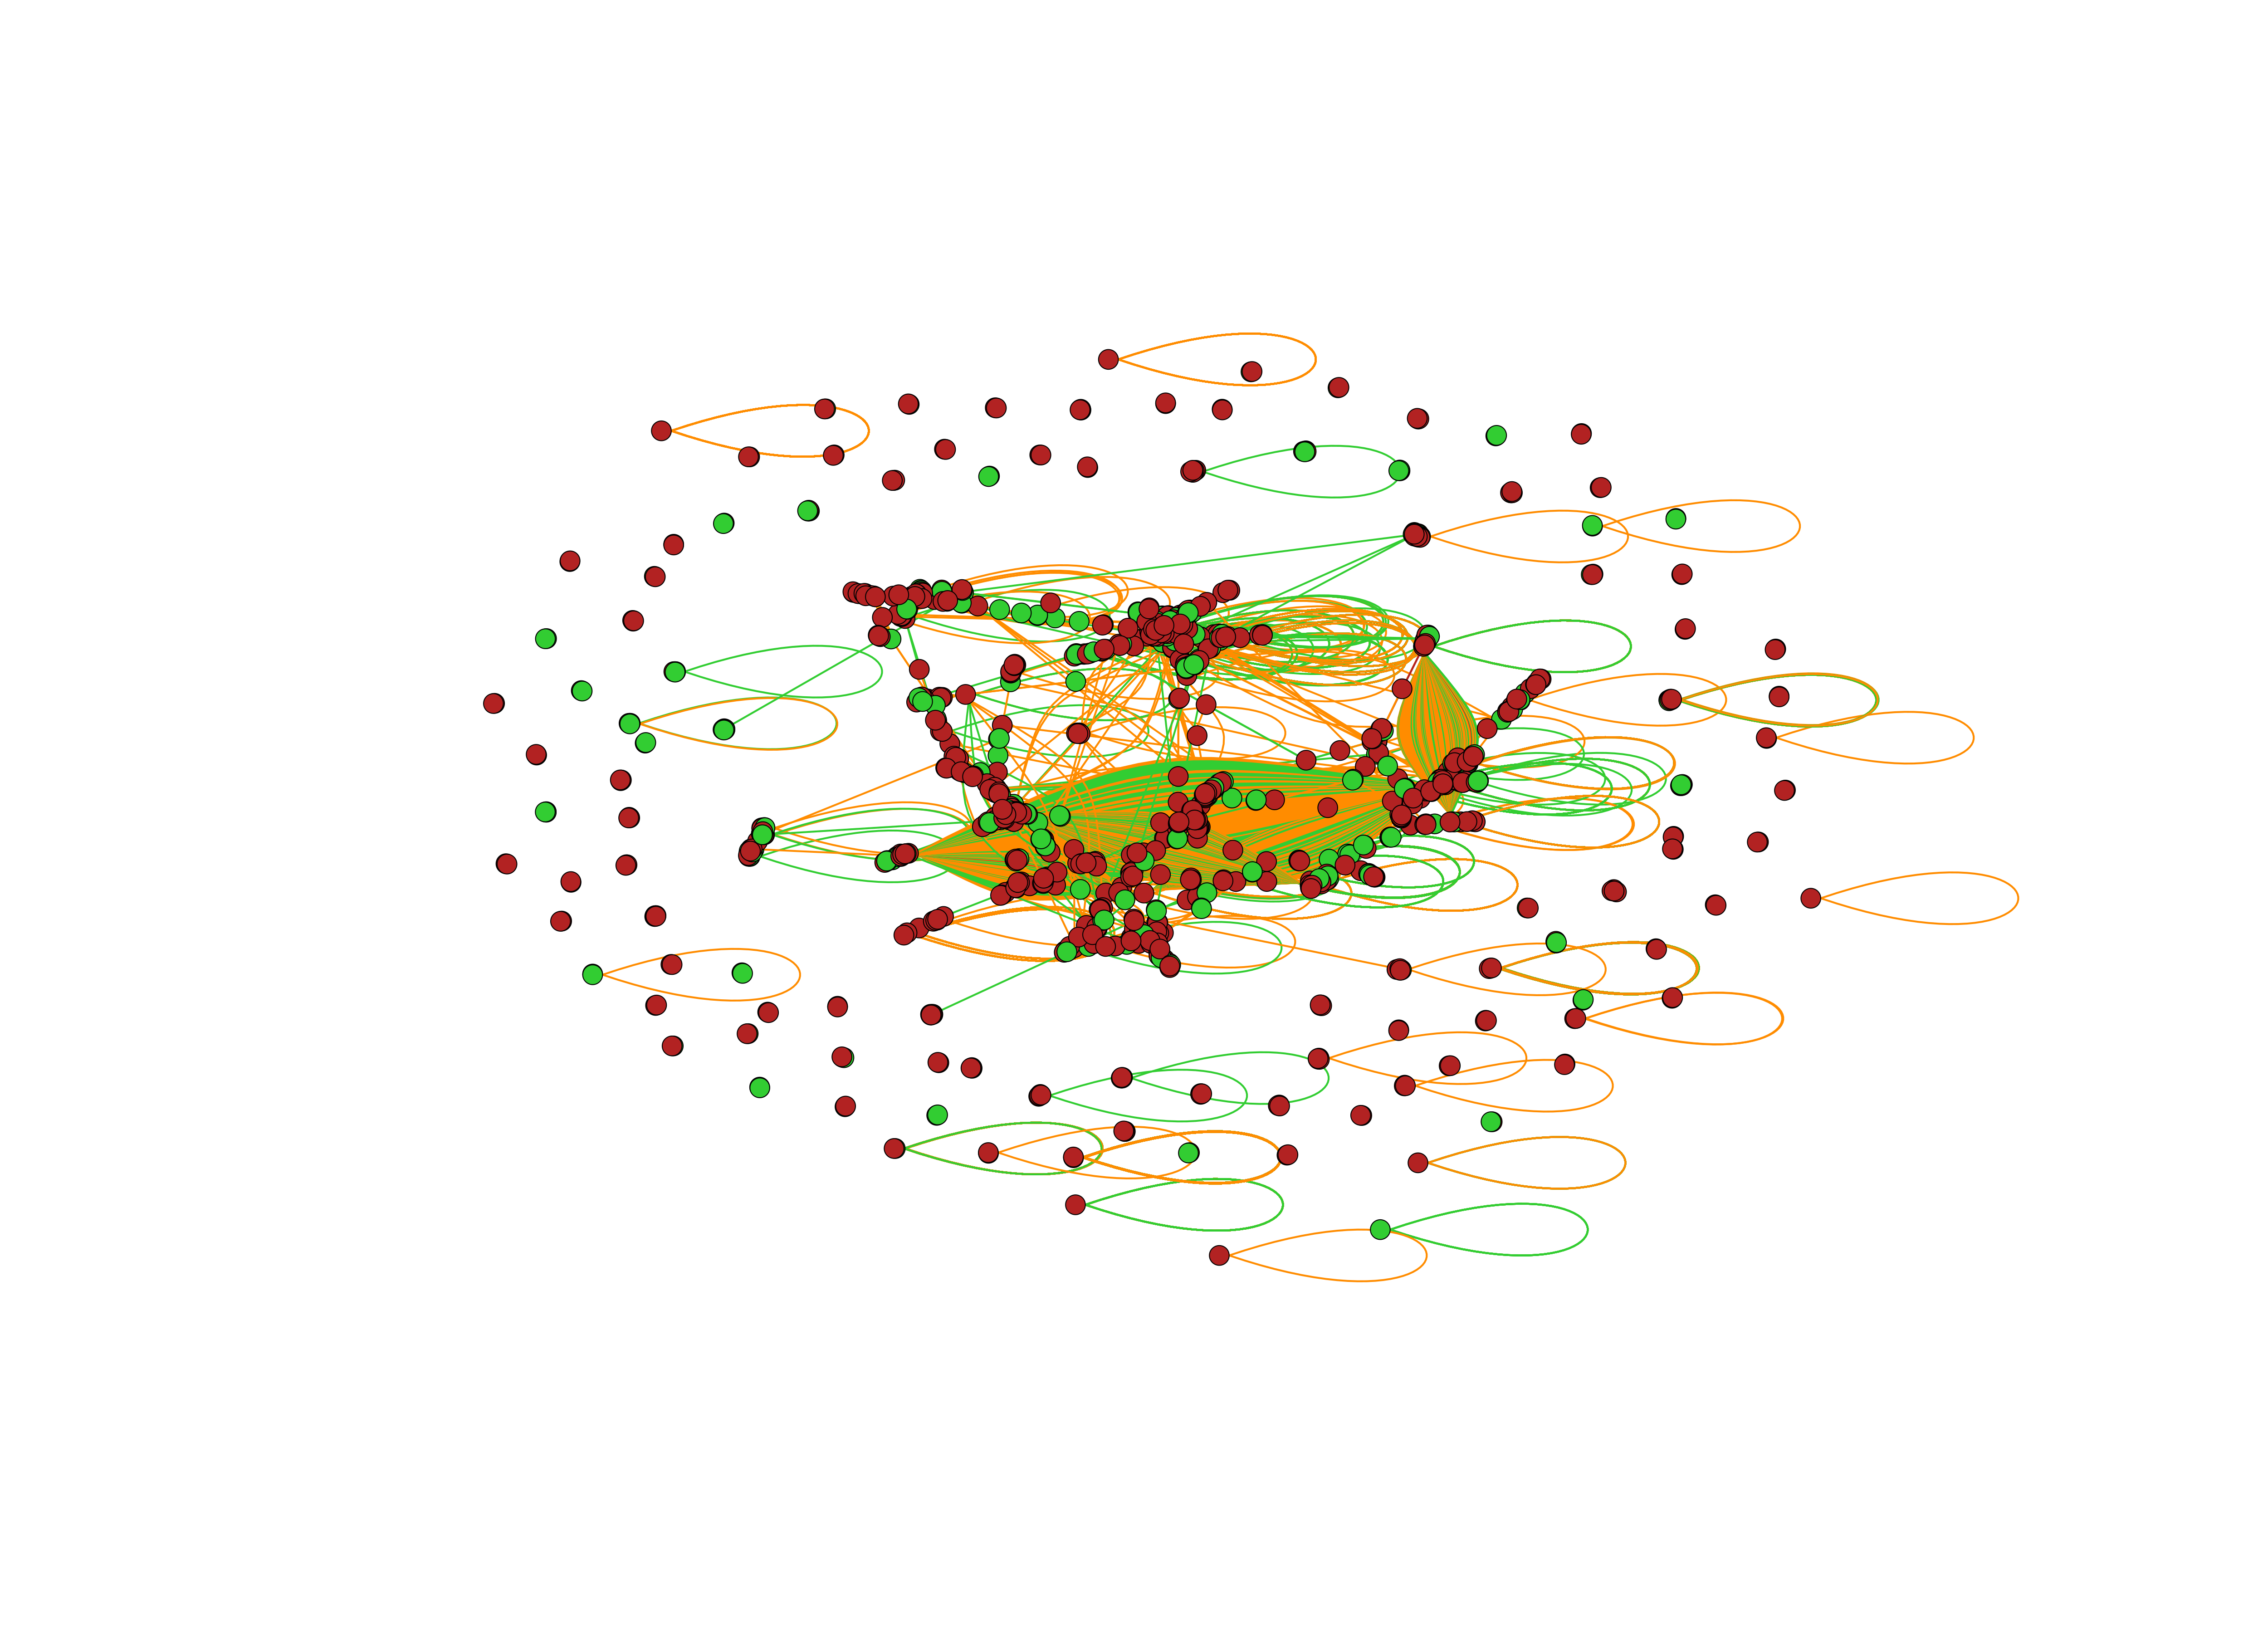

In [24]:
plot(graph_film_nominees,vertex.size=3,vertex.label=NA,edge.width=2,curved=FALSE,asp=0,margin=0.5)

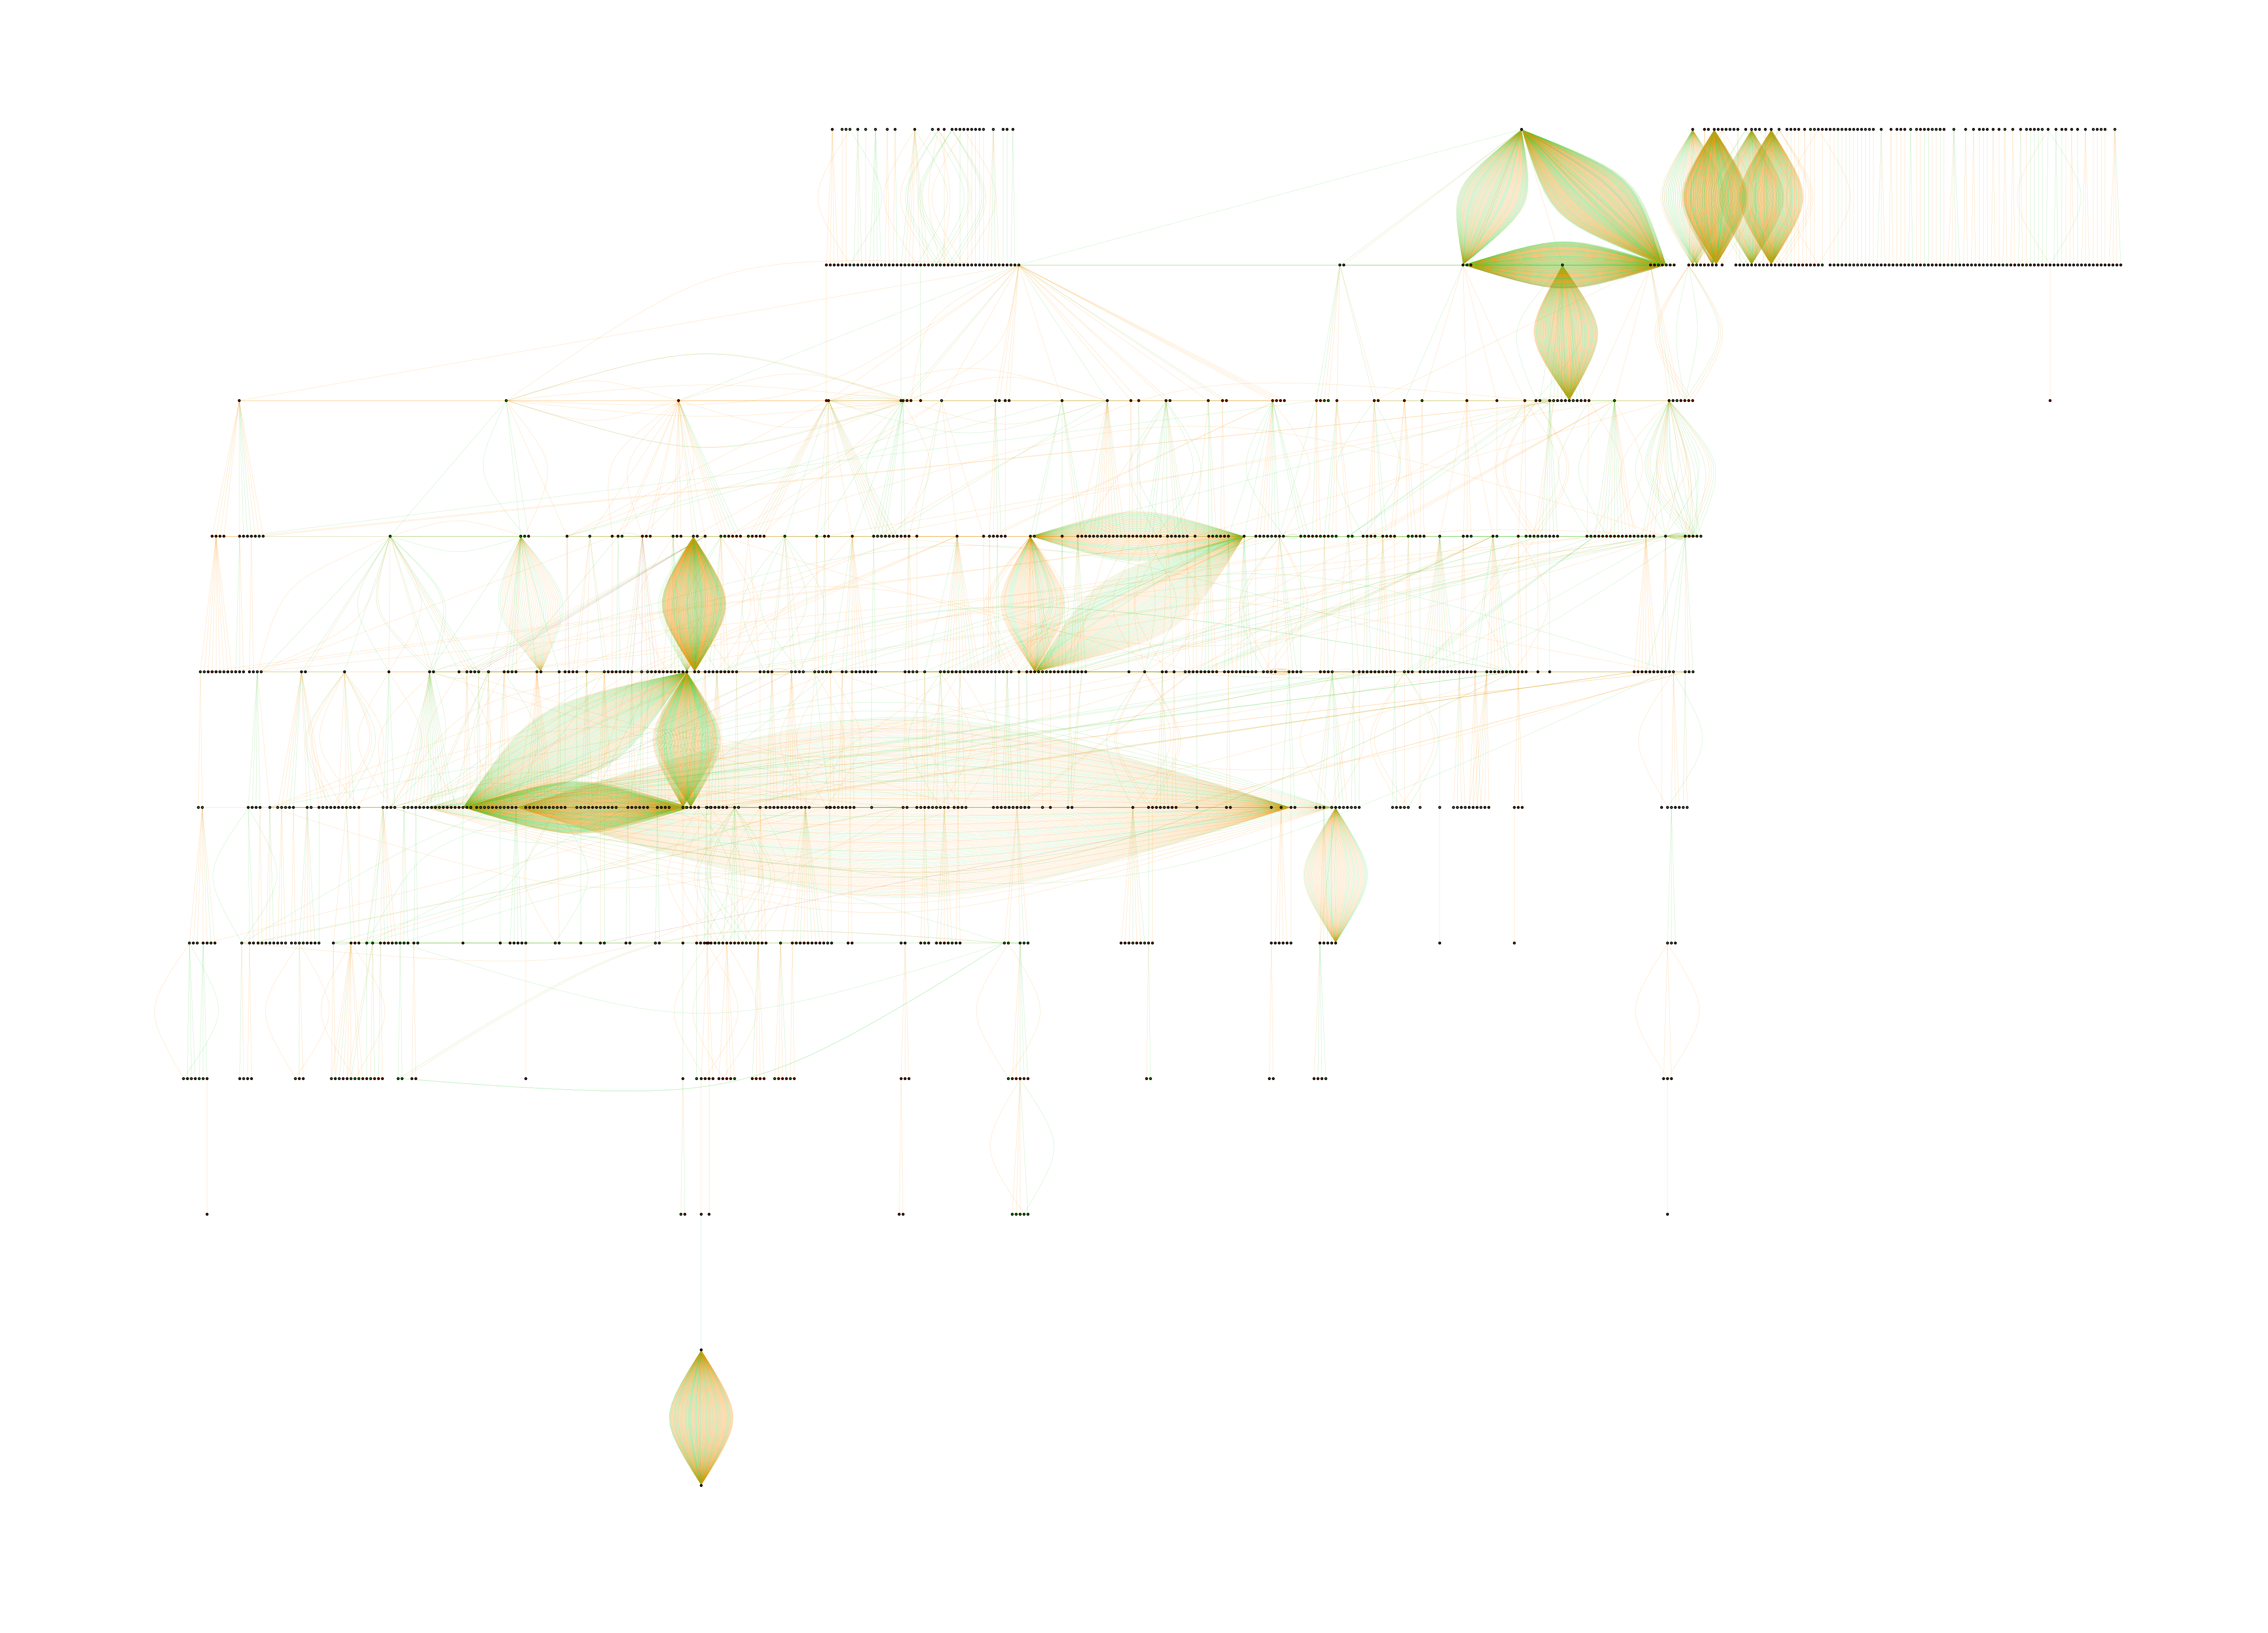

In [29]:
g = simplify(graph_film_nominees,remove.multiple = FALSE, remove.loops = TRUE)
coords <- layout_(g, as_tree())
plot(g, layout = coords,display.isolates=FALSE,vertex.size=0.2,vertex.label=NA,asp=0.7,edge.width=0.1,margin=0)

In [24]:
library(rgl)

In [25]:
coords <- layout_with_fr(graph_film_nominees,dim=3)
rgl.open()

In [26]:
bg3d("white")

In [27]:
rglplot(graph_film_nominees,layout=coords*100,vertex.size=3,vertex.label=NA,edge.width=1,curved=TRUE,asp=0)

In [28]:
library("tcltk")

In [37]:
id =tkplot(graph_film_nominees,vertex.size=3,vertex.label=NA)
coords <- tkplot.getcoords(id)

 - the other way around (does not make much sense...)

In [24]:
person_film = nominees_subset %>% select(1,15)
head(person_film)
nrow(person_film)
person_film_win = nominees_subset %>% select(1,15,16,17)

tconst    nominee         
31821 tt0035423 Hugh Jackman    
31822 tt0035423 "Until…", Sting 
33127 tt0036855 Ingrid Bergman  
33143 tt0036872 Barry Fitzgerald
33144 tt0036872 Leo McCarey     
33341 tt0037096 Agnes Moorehead

[1] 3038

In [25]:
person_film_win$color = NA
person_film_win$shape = NA
person_film_win[person_film_win$win_gg_people == 0,]$shape = "csquare"
person_film_win[person_film_win$win_gg_people == 1,]$shape = "circle"
person_film_win[person_film_win$averageRating >= 7.5,]$color = "green"
person_film_win[person_film_win$averageRating <= 5,]$color = "red"
person_film_win[(person_film_win$averageRating>5 & person_film_win$averageRating<7.5) ,]$color = "orange"

head(person_film_win)

tconst    nominee          win_gg_people averageRating color  shape  
31821 tt0035423 Hugh Jackman     0             6.4           orange csquare
31822 tt0035423 "Until…", Sting  1             6.4           orange circle 
33127 tt0036855 Ingrid Bergman   1             7.8           green  circle 
33143 tt0036872 Barry Fitzgerald 1             7.0           orange circle 
33144 tt0036872 Leo McCarey      1             7.0           orange circle 
33341 tt0037096 Agnes Moorehead  1             7.1           orange circle

In [30]:
split_person=split(person_film,person_film$nominee)
length(split_person)

[1] 1652

In [31]:
combination_matrix_2 = c()
for (i in 1:length(split_person)){
    if(length(split_person[[i]][[2]]) > 1) {
        temp = combn(as.vector(split_person[[i]][[1]]),2)
        combination_matrix_2 = cbind(combination_matrix_2,temp)
    }
}

In [33]:
combination_matrix_2

[,1]      [,2]      [,3]      [,4]      [,5]      [,6]      [,7]     
[1,] tt0120338 tt1010048 tt0472062 tt0472062 tt0472062 tt1285016 tt1285016
[2,] tt0120338 tt1542344 tt1285016 tt2080374 tt4209788 tt2080374 tt4209788
     [,8]      [,9]      [,10]     [,11] [,12]     [,13]     [,14]    
[1,] tt2080374 tt1315981 tt7349662 ...   tt1848902 tt1848902 tt1848902
[2,] tt4209788 tt1536048 tt7653254 ...   tt1848902 tt1848902 tt1848902
     [,15]     [,16]     [,17]     [,18]     [,19]     [,20]     [,21]    
[1,] tt1848902 tt1848902 tt1848902 tt1848902 tt1848902 tt1848902 tt1848902
[2,] tt1848902 tt1848902 tt1848902 tt1848902 tt1848902 tt1848902 tt1848902

In [57]:
pf_df = data.frame(from=combination_matrix_2[1,],to=combination_matrix_2[2,])
graph_nominees_film= graph_from_data_frame(pf_df,directed=FALSE)
E(graph_nominees_film)$color = person_film_win$color
V(graph_nominees_film)$shape = person_film_win$shape

Warning message in eattrs[[name]][index] <- value:
“number of items to replace is not a multiple of replacement length”Warning message in vattrs[[name]][index] <- value:
“number of items to replace is not a multiple of replacement length”

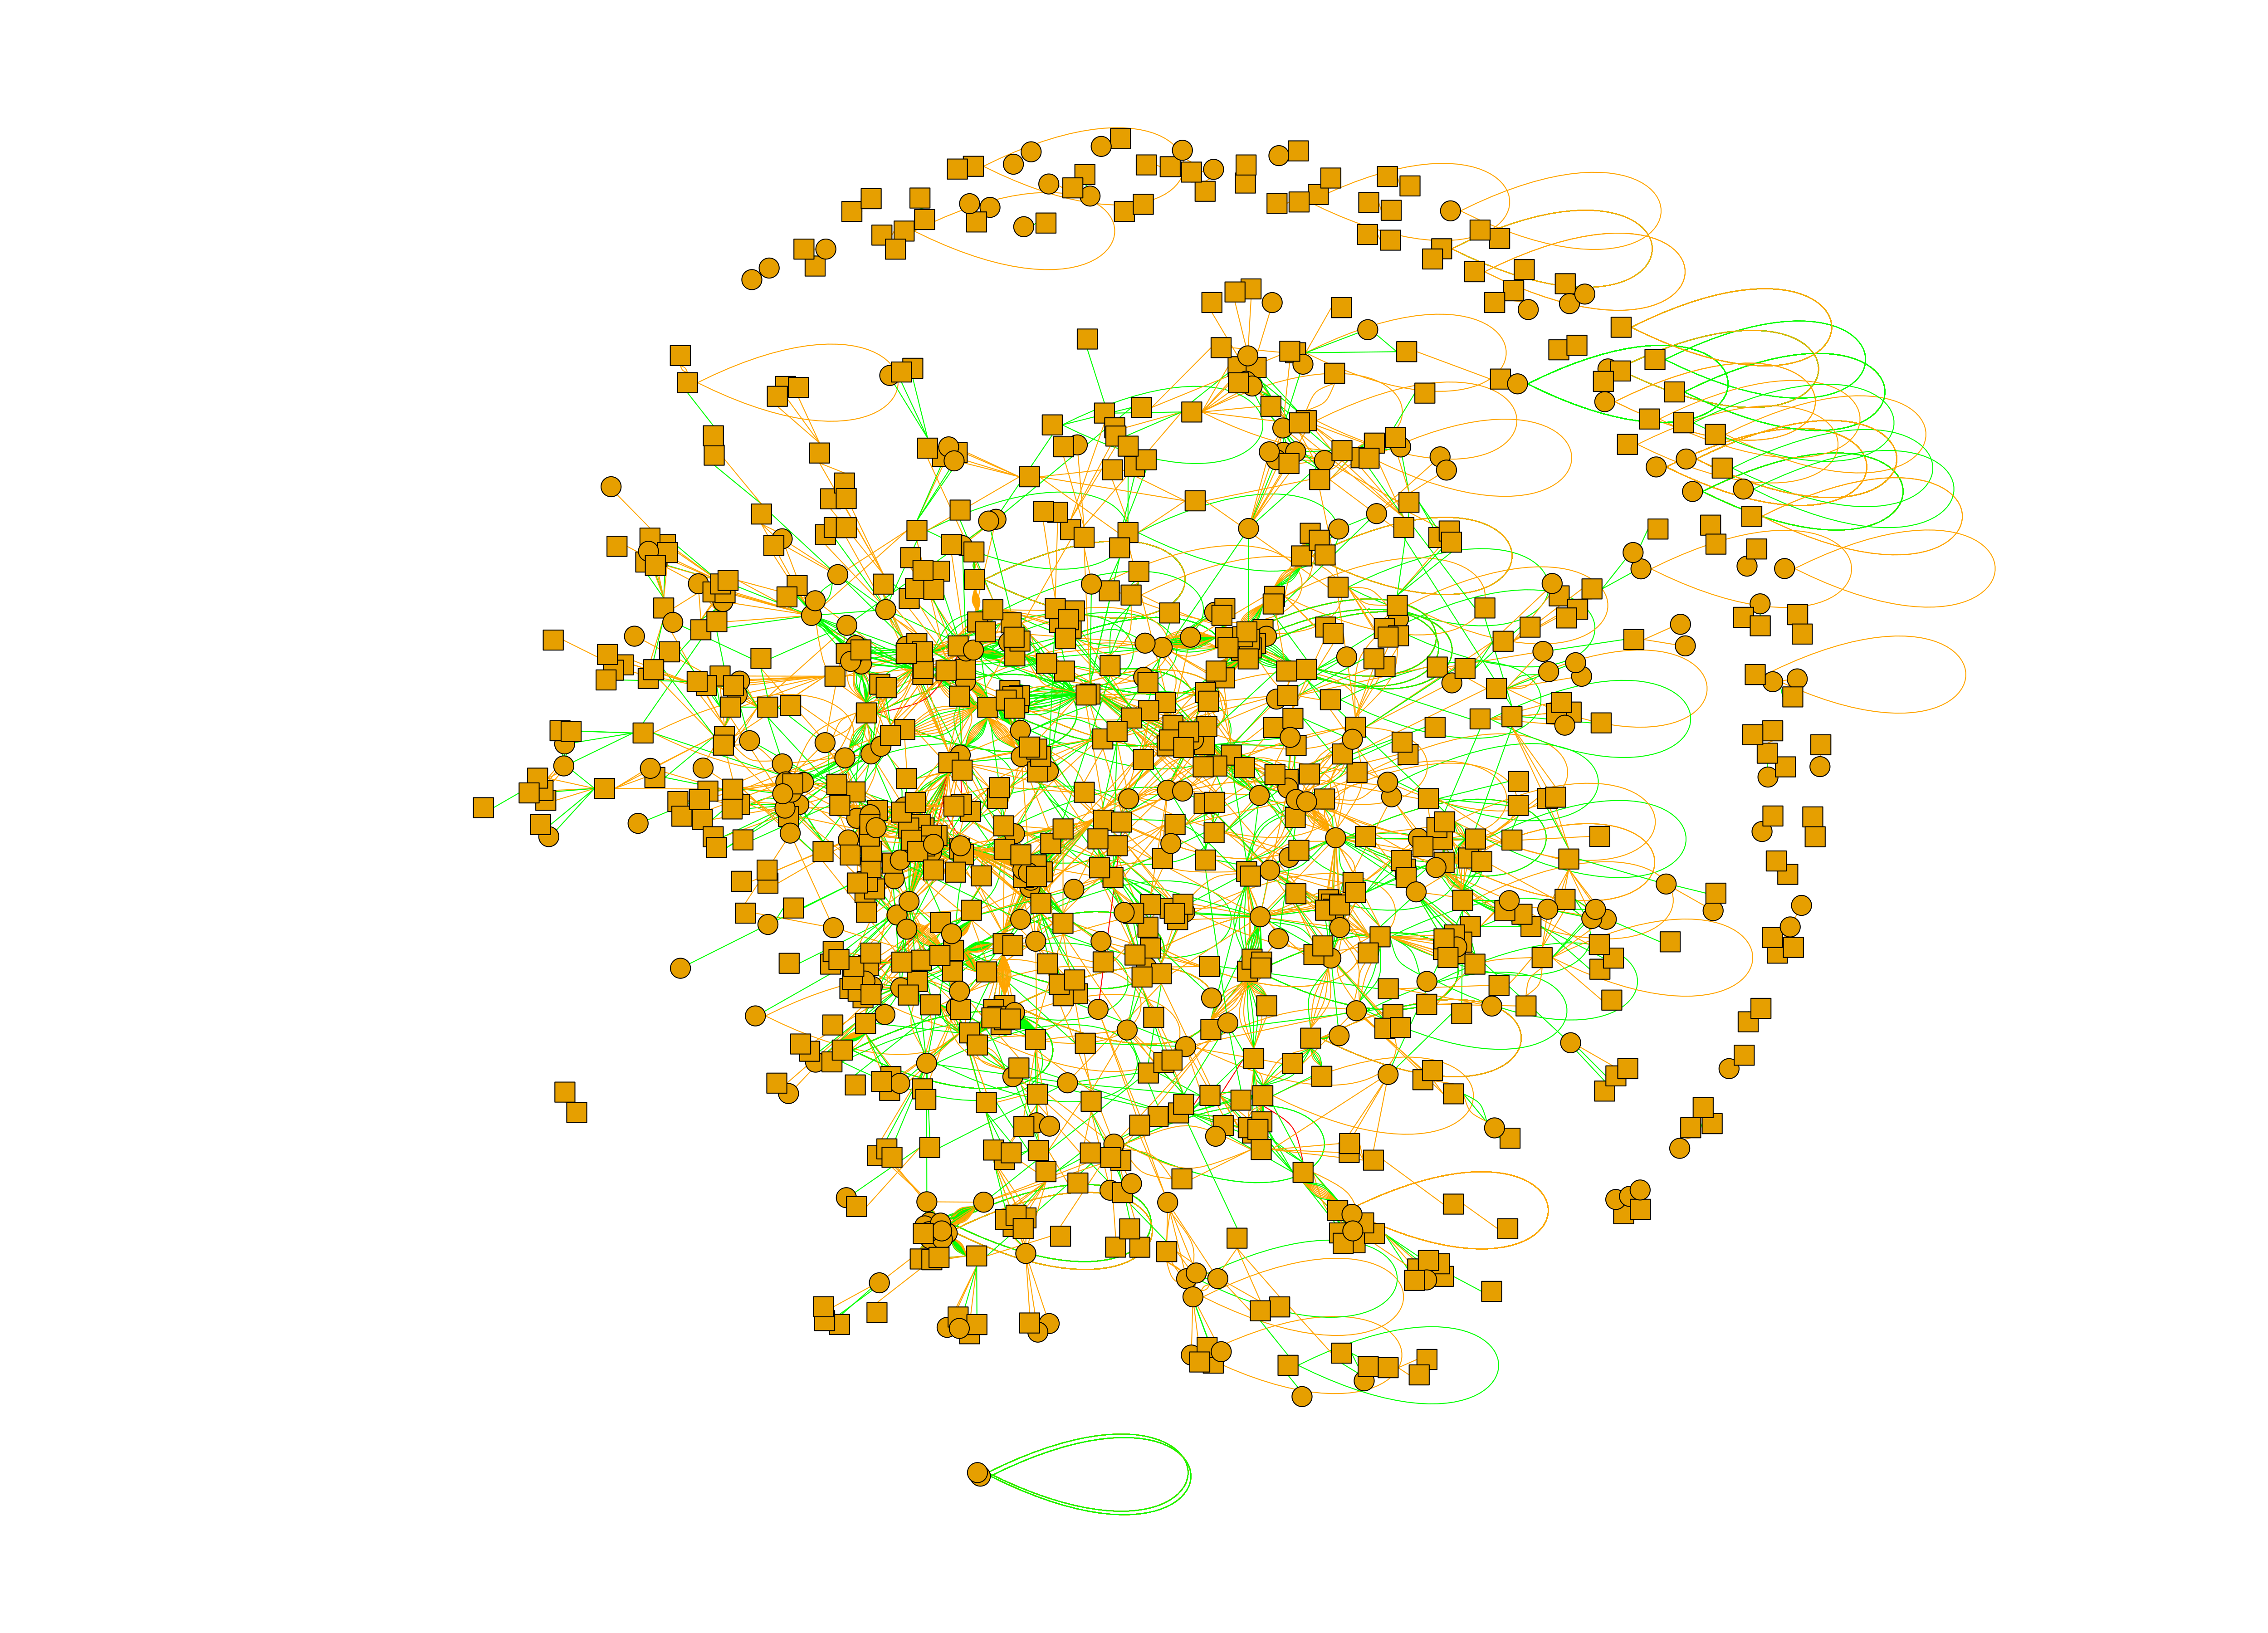

In [58]:
plot(graph_nominees_film,vertex.size=3,vertex.label=NA)

In [46]:
V(graph_nominees_film)

+ 933/933 vertices, named, from f5989e3:
  [1] tt0120338  tt1010048  tt0472062  tt1285016  tt2080374  tt1315981 
  [7] tt7349662  tt6266538  tt0083564  tt0070666  tt0072890  tt0075774 
 [13] tt0083598  tt0086250  tt0098273  tt0099422  tt0104348  tt0105323 
 [19] tt1132623  tt1745862  tt0060453  tt0101414  tt0103639  tt0114148 
 [25] tt0077928  tt0095647  tt0117442  tt0057590  tt0066344  tt0085461 
 [31] tt0195685  tt0314097  tt0449467  tt0257360  tt0375063  tt0365737 
 [37] tt0421715  tt0446755  tt0810819  tt1024648  tt1504320  tt2084970 
 [43] tt3281548  tt5104604  tt1454468  tt6155172  tt0105107  tt0119679 
 [49] tt0064381  tt0076245  tt0461770  tt0918927  tt1126590  tt1800241 
 [55] tt2543164  tt0098724  tt0099699  tt10702760 tt0114388  tt0190332 
+ ... omitted several vertices

In [41]:
V(graph_film_nominees)

+ 1175/1175 vertices, named, from bf3ed0f:
   [1] Hugh Jackman                                                                                            
   [2] Barry Fitzgerald                                                                                        
   [3] Billy Wilder                                                                                            
   [4] Anne Baxter                                                                                             
   [5] Celeste Holm                                                                                            
   [6] Elia Kazan                                                                                              
   [7] Richard Schweizer                                                                                       
   [8] Fred Zinnemann                                                                                          
   [9] Walter Huston                                         

In [47]:
E(graph_film_nominees)

+ 8926/8926 edges from bf3ed0f (vertex names):
 [1] Hugh Jackman     --"Until…", Sting    
 [2] Barry Fitzgerald --Leo McCarey        
 [3] Billy Wilder     --Ray Milland        
 [4] Anne Baxter      --Clifton Webb       
 [5] Celeste Holm     --Elia Kazan         
 [6] Celeste Holm     --Dean Stockwell     
 [7] Elia Kazan       --Dean Stockwell     
 [8] Richard Schweizer--Fred Zinnemann     
 [9] Richard Schweizer--Ivan Jandl         
[10] Fred Zinnemann   --Ivan Jandl         
+ ... omitted several edges

In [48]:
neighbors(graph_film_nominees,V(graph_film_nominees)[1],mode=1)

+ 4/1175 vertices, named, from bf3ed0f:
[1] Anne Hathaway                                                       
[2] "Until…", Sting                                                     
[3] "This Is Me", Justin Paul, Benj Pasek                               
[4] "Suddenly", Herbert Kretzmer, Claude-Michel Schonberg, Alain Boublil

In [54]:
print(graph_film_nominees,graph.attributes=TRUE,vertex.attributes=TRUE)

IGRAPH bf3ed0f UN-- 1175 8926 -- 
+ attr: name (v/c), color (v/c), shape (v/c)
+ edges from bf3ed0f (vertex names):
 [1] Hugh Jackman     --"Until…", Sting Barry Fitzgerald --Leo McCarey    
 [3] Billy Wilder     --Ray Milland     Anne Baxter      --Clifton Webb   
 [5] Celeste Holm     --Elia Kazan      Celeste Holm     --Dean Stockwell 
 [7] Elia Kazan       --Dean Stockwell  Richard Schweizer--Fred Zinnemann 
 [9] Richard Schweizer--Ivan Jandl      Fred Zinnemann   --Ivan Jandl     
[11] Walter Huston    --John Huston     James Whitmore   --Robert Pirosh  
[13] Ruth Roman       --Franz F. Planer Vincent Sherman  --Richard Todd   
[15] Vincent Sherman  --Richard Todd    Richard Todd     --Richard Todd   
+ ... omitted several edges


In [49]:
get.edgelist(graph_film_nominees)

[,1]                  [,2]                                         
 [1,] Hugh Jackman          "Until…", Sting                              
 [2,] Barry Fitzgerald      Leo McCarey                                  
 [3,] Billy Wilder          Ray Milland                                  
 [4,] Anne Baxter           Clifton Webb                                 
 [5,] Celeste Holm          Elia Kazan                                   
 [6,] Celeste Holm          Dean Stockwell                               
 [7,] Elia Kazan            Dean Stockwell                               
 [8,] Richard Schweizer     Fred Zinnemann                               
 [9,] Richard Schweizer     Ivan Jandl                                   
[10,] Fred Zinnemann        Ivan Jandl                                   
[11,] Walter Huston         John Huston                                  
[12,] James Whitmore        Robert Pirosh                                
[13,] Ruth Roman            Franz F. Planer                              
[14,] Vincent Sherman       Richard Todd                                 
[15,] Vincent Sherman       Richard Todd                                 
[16,] Richard Todd          Richard Todd                                 
[17,] Miriam Hopkins        William Wyler                                
[18,] Miriam Hopkins        Olivia de Havilland                          
[19,] William Wyler         Olivia de Havilland                          
[20,] Bette Davis           Thelma Ritter                                
[21,] Bette Davis           George Sanders                               
[22,] Bette Davis           Joseph L. Mankiewicz                         
[23,] Bette Davis           Joseph L. Mankiewicz                         
[24,] Thelma Ritter         George Sanders                               
[25,] Thelma Ritter         Joseph L. Mankiewicz                         
[26,] Thelma Ritter         Joseph L. Mankiewicz                         
[27,] George Sanders        Joseph L. Mankiewicz                         
[28,] George Sanders        Joseph L. Mankiewicz                         
[29,] Joseph L. Mankiewicz  Joseph L. Mankiewicz                         
[30,] John Huston           Ben Maddow, John Huston                      
[31,] ...                   ...                                          
[32,] John Williams         Steven Spielberg                             
[33,] John Williams         Liz Hannah, Josh Singer                      
[34,] Charlize Theron       Margot Robbie                                
[35,] Bong Joon Ho          Bong Joon Ho, Han Jin Won                    
[36,] Viggo Mortensen       Mahershala Ali                               
[37,] Viggo Mortensen       Peter Farrelly                               
[38,] Viggo Mortensen       Nick Vallelonga, Brian Currie, Peter Farrelly
[39,] Mahershala Ali        Peter Farrelly                               
[40,] Mahershala Ali        Nick Vallelonga, Brian Currie, Peter Farrelly
[41,] Peter Farrelly        Nick Vallelonga, Brian Currie, Peter Farrelly
[42,] Lucas Hedges          Revelation                                   
[43,] Barry Jenkins         Regina King                                  
[44,] Joaquin Phoenix       Todd Phillips                                
[45,] Joaquin Phoenix       Hildur Guðnadóttir                           
[46,] Todd Phillips         Hildur Guðnadóttir                           
[47,] John David Washington Adam Driver                                  
[48,] John David Washington Spike Lee                                    
[49,] Adam Driver           Spike Lee                                    
[50,] Scarlett Johansson    Adam Driver                                  
[51,] Laura Dern            Scarlett Johansson                           
[52,] Scarlett Johansson    Noah Baumbach                                
[53,] Scarlett Johansson    Randy Newman                                 
[54,] Laur